In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from scipy import stats
sys.path.append('../scripts')

from preprocess import load_countries

**Load clean data of benin, togo, sierraleone**

In [15]:
paths = ['../data/benin_clean.csv', '../data/togo_clean.csv', '../data/sieraleone_clean.csv']
full_df = load_countries(paths)
full_df.head()

,Unnamed: 0,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country
0,0,2021-08-09 00:01:00,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,benin
1,1,2021-08-09 00:02:00,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,benin
2,2,2021-08-09 00:03:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,benin
3,3,2021-08-09 00:04:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,benin
4,4,2021-08-09 00:05:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,benin


**Boxplots of GHI, DNI, DHI side-by-side (one plot per metric, colored by country).**

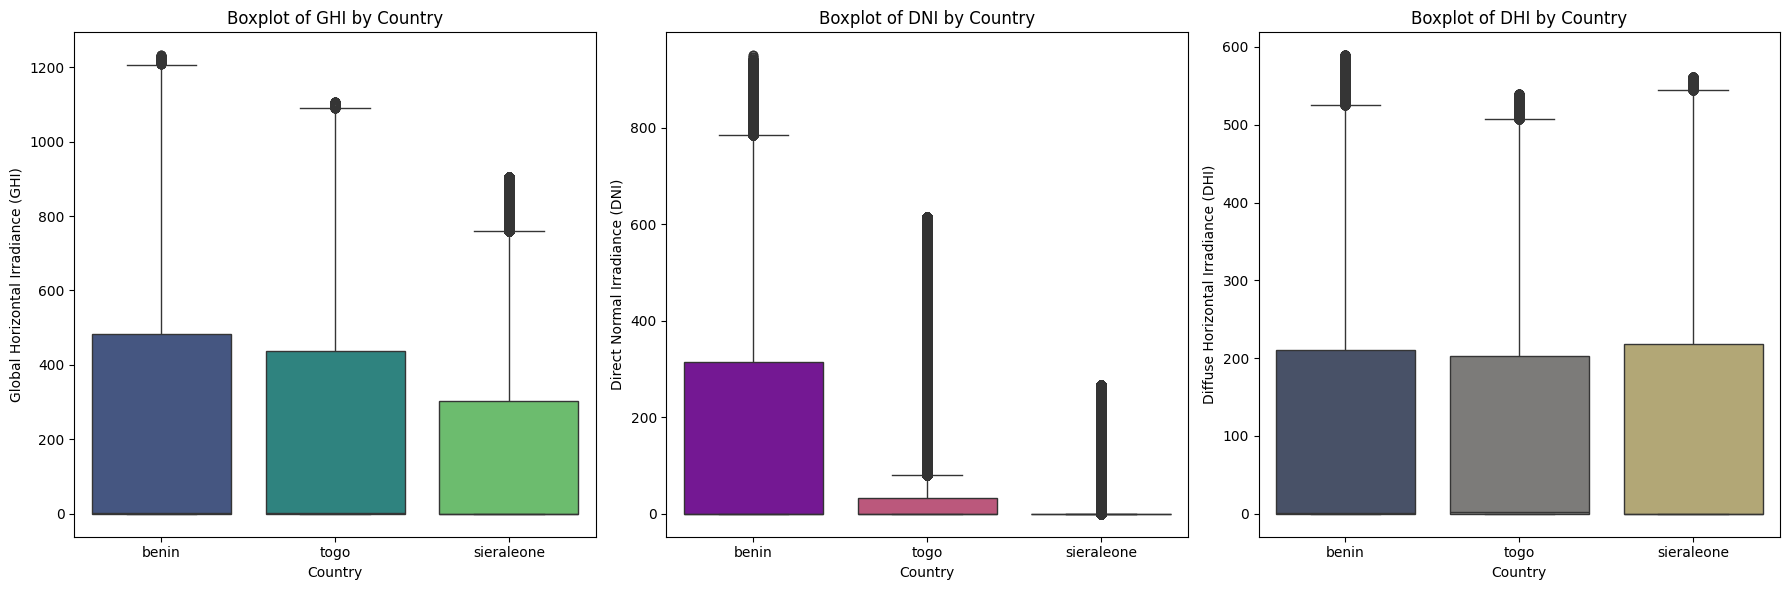

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
# Boxplot for GHI
sns.boxplot(ax=axes[0], x='Country', y='GHI', data=full_df, hue='Country', palette='viridis', legend=False)
axes[0].set_title('Boxplot of GHI by Country')
axes[0].set_ylabel('Global Horizontal Irradiance (GHI)')
axes[0].set_xlabel('Country')

# Boxplot for DNI
sns.boxplot(ax=axes[1], x='Country', y='DNI', data=full_df, hue='Country', palette='plasma', legend=False)
axes[1].set_title('Boxplot of DNI by Country')
axes[1].set_ylabel('Direct Normal Irradiance (DNI)')
axes[1].set_xlabel('Country')

# Boxplot for DHI
sns.boxplot(ax=axes[2], x='Country', y='DHI', data=full_df, hue='Country', palette='cividis', legend=False)
axes[2].set_title('Boxplot of DHI by Country')
axes[2].set_ylabel('Diffuse Horizontal Irradiance (DHI)')
axes[2].set_xlabel('Country')

plt.tight_layout()
plt.show()

**comparing mean, median, and standard deviation of GHI, DNI, DHI across countries**

In [9]:
full_df.groupby('Country').agg({
    'GHI':['median', 'mean', 'std'],
    'DHI':['median', 'mean', 'std'],
    'DNI':['median', 'mean', 'std']
})

GHI                            DHI                          \
           median        mean         std median        mean         std   
Country                                                                    
benin         1.8  241.739837  329.836198    1.6  112.371911  151.485846   
sieraleone    0.3  172.599107  260.638137    0.0  110.630960  149.874973   
togo          2.1  228.701558  318.337970    2.5  107.644774  145.793970   

              DNI                          
           median        mean         std  
Country                                    
benin         0.0  167.438243  261.543255  
sieraleone    0.0   13.805644   45.266995  
togo          0.0   80.572452  163.852645

**Statistical Testing**

the pv-value and Kruskal-Wallis H Test

In [17]:
countries = ['benin', 'togo', 'sieraleone']
group = [full_df['GHI'][full_df['Country']==country] for country in countries]
h_ghi, p_ghi = stats.kruskal(*group)
print(h_ghi)
print(p_ghi)

4816.666332759832
0.0
